In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
service = Service(executable_path='C:/Users/Asus/Desktop/shray/coding ninjas/chromedriver.exe')
driver = webdriver.Chrome(service = service)

In [2]:
base_url = 'https://www.instagram.com'
driver.get('https://www.instagram.com/')
driver.maximize_window()

In [3]:
username = '##########'
password = '##########'

In [4]:
import time
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
try:
    wait = WebDriverWait(driver,10)
    user_name = wait.until(EC.presence_of_element_located((By.NAME,'username')))
    user_name.send_keys(username)
    pass_word = wait.until(EC.presence_of_element_located((By.NAME,'password')))
    pass_word.send_keys(password)
    time.sleep(4)
    log_in_button = wait.until(EC.element_to_be_clickable((By.XPATH,'//*[@id="loginForm"]/div/div[3]/button')))
    log_in_button.submit()
    #save info pop up:- Save Info and Not Now are 2 options, we will go for not now
    not_now = wait.until(EC.presence_of_element_located((By.XPATH,'//*[@class="_ac8f"]/div')))
    not_now.click()
    # to turn off notifications
    turn_off = wait.until(EC.presence_of_element_located((By.XPATH,'//*[@class="_a9-z"]//button[2]')))
    turn_off.click()
    driver.save_screenshot('successful_login.png')
except:
    print(TRY-AGAIN)

###
### Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.
#### From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers.
#### Now Find the number of posts these handles have done in the previous 3 days.
#### Depict this information using a suitable graph.

In [5]:
def search(s):
    try:
        driver.find_element(By.XPATH,'//*[@class="x1iyjqo2 xh8yej3"]/div[2]//div[contains(@class,"x1n2onr6")]/a').click()
    except:
        print("Some error")
    search_field = wait.until(EC.element_to_be_clickable((By.XPATH,'//*[@class="_aawf _aawg _aexm _abli _amr8"]/input')))
    search_field.send_keys(s)

In [6]:
def open_profile(s):
    #try:
    time.sleep(4)
    search(s)
    time.sleep(3)
    wait = WebDriverWait(driver, 10)
    element = wait.until(EC.presence_of_element_located((By.XPATH,'//*[contains(@class,"x9f619 x78zum5 xdt5ytf x12dtdjy x6ikm8r x1odjw0f x4uap5 x18d9i69")]/div/a')))
    handle = driver.find_element(By.XPATH,'//*[contains(@class,"x9f619 x78zum5 xdt5ytf x12dtdjy x6ikm8r x1odjw0f x4uap5 x18d9i69")]/div/a')
    handle.click()
    time.sleep(2)
    search_bar = driver.find_elements(By.XPATH,'//*[@class="_aawf _aawg _aexm _abli _amr8"]/input')
    if len(search_bar)>0:
        driver.find_element(By.XPATH,'//*[@class="x1iyjqo2 xh8yej3"]/div[2]//div[contains(@class,"x1n2onr6")]/a').click()
    #except:
     #   print("Something went wrong")

In [7]:
from bs4 import BeautifulSoup as bs
def search_list(s,name_store,follower_count):
    base_url='https://www.instagram.com'
    search(s)
    wait = WebDriverWait(driver,10)
    time.sleep(3)
    element = wait.until(EC.presence_of_all_elements_located((By.XPATH,'//*[contains(@class,"x9f619 x78zum5 xdt5ytf x12dtdjy x6ikm8r x1odjw0f x4uap5")]//a/div/div/div/div[2]/div/div/span/span/div/span')))
    element_list = driver.find_elements(By.XPATH,'//*[contains(@class,"x9f619 x78zum5 xdt5ytf x12dtdjy x6ikm8r x1odjw0f x4uap5")]//a/div/div/div/div[2]/div/div/span/span/div/span')
    url_list = driver.find_elements(By.XPATH,'//*[@class="x6s0dn4 x1wzhzgj x78zum5 xdt5ytf x5yr21d x1n2onr6 xh8yej3 xhtitgo"]/div/div')
    time.sleep(5)
    count=0
    for i in element_list:
        attr = i.get_attribute('innerHTML')
        name_store.append(attr)
        count+=1
        if(count==10):
            break 
    urls = wait.until(EC.presence_of_all_elements_located((By.XPATH,'//*[contains(@class,"x9f619 x78zum5 xdt5ytf x12dtdjy x6ikm8r x1odjw0f x4uap5")]//a')))        
    urls= urls[:10]
    for i in urls:
        data = bs(i.get_attribute('outerHTML'),'html.parser')
        url.append(base_url+data.a['href'])                                                       
    driver.save_screenshot('successful_search.png')    
    time.sleep(2)
    wait = WebDriverWait(driver,10)
    driver.find_element(By.XPATH,'//*[@class="x1iyjqo2 xh8yej3"]/div[2]/span/div/a').click()

In [8]:
name_store=[]
follower_count=[]
url = []
search_list('food',name_store,url)
#print(name_store)
#print(url)

In [9]:
from bs4 import BeautifulSoup as bs
follower_count=[]
count = 0
for i in url:
    driver.execute_script('window.open(arguments[0]);',i)
    time.sleep(2)
    driver.switch_to.window(driver.window_handles[1])
    time.sleep(3)
    #print(driver.title)
    element = driver.find_element(By.XPATH,'//ul[@class="x78zum5 x1q0g3np xieb3on"]/li[2]/a/span').get_attribute('outerHTML')
    data = bs(element,'html.parser')
    followers = data.span["title"]
    #print(followers)
    follower_count.append(followers)
    driver.switch_to.window(driver.window_handles[1])
    driver.close()
    driver.switch_to.window(driver.window_handles[0])

In [10]:
handler_follower={}
for i in range(len(name_store)):
    handler_follower[(url[i],name_store[i])] = int(follower_count[i].replace(',',''))
handler_follower = sorted(handler_follower.items(), key=lambda x: x[1], reverse=True)  

In [11]:
handler_follower

[(('https://www.instagram.com/yourfoodlab/', 'yourfoodlab'), 2712901),
 (('https://www.instagram.com/foodie_incarnate/', 'foodie_incarnate'),
  1581553),
 (('https://www.instagram.com/dilsefoodie/', 'dilsefoodie'), 1123997),
 (('https://www.instagram.com/foodpharmer/', 'foodpharmer'), 449003),
 (('https://www.instagram.com/foodtalkindia/', 'foodtalkindia'), 309685),
 (('https://www.instagram.com/foodrooaster/', 'foodrooaster'), 263413),
 (('https://www.instagram.com/food/', 'food'), 182366),
 (('https://www.instagram.com/delhi_streets_food/', 'delhi_streets_food'),
  43238),
 (('https://www.instagram.com/food_in_guwahati/', 'food_in_guwahati'), 6022),
 (('https://www.instagram.com/_foodcam_/', '_foodcam_'), 309)]

In [12]:
handlers=[]
followers=[]
url = []
for i in handler_follower[:5]:
    url.append(i[0][0])
    handlers.append(i[0][1])
    followers.append(i[1])

In [13]:
def compare(day,month,year,today):
    t_day = today.day
    t_month = today.month
    t_year = today.year
    t_date = ''+str(t_year)+'/'+str(t_month)+'/'+str(t_day)
    date = ''+str(year)+'/'+str(month)+'/'+str(day)
    d1 = datetime.strptime(t_date, "%Y/%m/%d")
    d2 = datetime.strptime(date, "%Y/%m/%d")
    if((d1-d2).days<=3):
        return True
    return False

In [14]:
def extract():
    date1 = driver.find_element(By.XPATH,'//*[@class="_aacl _aaco _aacu _aacx _aad6 _aade _aaqb"]/a/span/time').get_attribute('outerHTML')
    data = bs(date1,'html.parser')
    time = data.time["datetime"]
    time = time.split('T')[0]
    year = time.split('-')[0]
    month = time.split('-')[1]
    day = time.split('-')[2]
    return (day,month,year)

In [15]:
def posts_collect(end):
    while True:
        wait = WebDriverWait(driver,10)
        posts = wait.until(EC.presence_of_all_elements_located((By.XPATH,'//*[contains(@class,"x1gryazu xh8yej3")]/div[2]//div//*[@class="x1iyjqo2"]/div/div/div/div')))
        posts1 = driver.find_elements(By.XPATH,'//*[contains(@class,"x1gryazu xh8yej3")]/div[2]//div//*[@class="x1iyjqo2"]/div/div/div/div')         
        if(len(posts1)>end):
            break
        current_height = driver.execute_script('return document.body.scrollHeight;')
        driver.execute_script('window.scrollTo(0,arguments[0]);',current_height)
        time.sleep(3)
        new_height = driver.execute_script('return document.body.scrollHeight;')
        if new_height==current_height:
            break
        current_height = new_height    
    handler_posts = posts1[:end]
    
    return handler_posts

In [16]:
import time
from datetime import date
from datetime import datetime
post_count=[]
today = date.today()
for i in url:
    driver.execute_script('window.open(arguments[0]);',i)
    time.sleep(2)
    driver.switch_to.window(driver.window_handles[1])
    time.sleep(3)
    posts = posts_collect(20)
    count=0
    for i in posts:
        time.sleep(3)
        i.click()
        day,month,year = extract()
        diff = compare(day,month,year,today)
        if(diff==False):
            break
        count+=1
        driver.back()
    post_count.append(count)    
    driver.close()
    driver.switch_to.window(driver.window_handles[0])

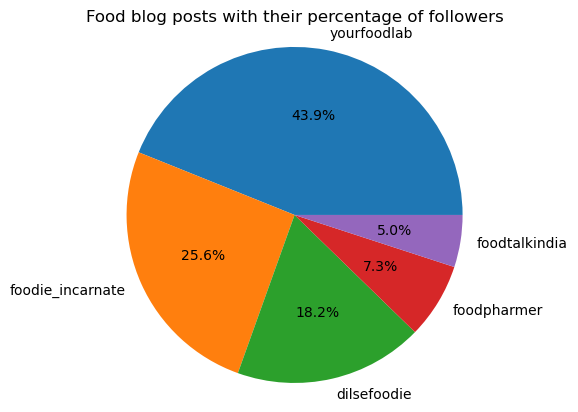

In [17]:
import matplotlib.pyplot as plt
plt.pie(followers,labels = handlers,autopct="%.1f%%")
plt.axis("equal")
plt.title("Food blog posts with their percentage of followers")
plt.show()

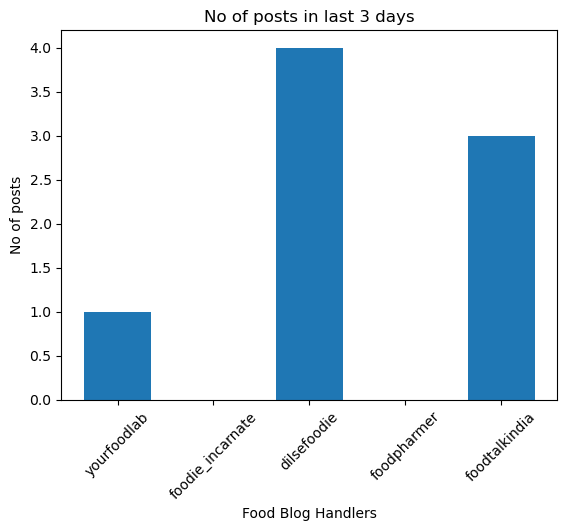

In [18]:
plt.bar(handlers,post_count,width=0.7)
plt.xticks(rotation=45)
plt.xlabel('Food Blog Handlers')
plt.ylabel('No of posts')
plt.title("No of posts in last 3 days")
plt.show()

###
### Your friend also needs a list of hashtags that he should use in his posts.
#### Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.
#### Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.
#### Create a csv file with two columns : the word and its frequency
#### Now, find the hashtags that were most popular among these bloggers
#### Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

In [19]:
def extract_cap():
    caption = driver.find_elements(By.XPATH,'//div[@class="_ae5q _akdn _ae5r _ae5s"]/ul[1]//h1[@class="_aacl _aaco _aacu _aacx _aad7 _aade"]/a')
    hashtags=[]
    for i in caption:
        tags = i.get_attribute('innerHTML')
        hashtags.append(tags)
    return hashtags

In [20]:
hash_dict={}
for i in url:
    driver.execute_script('window.open(arguments[0]);',i)
    time.sleep(2)
    driver.switch_to.window(driver.window_handles[1])
    time.sleep(3)
    posts = posts_collect(10)
    for i in posts:
        time.sleep(3)
        i.click()
        time.sleep(3)
        hashtags = extract_cap()     
        for hash in hashtags:
            if '@' not in hash:
                if hash in hash_dict:
                    hash_dict[hash]+=1
                else:
                    hash_dict[hash]=1
        driver.back()
    driver.close()
    driver.switch_to.window(driver.window_handles[0])     

In [21]:
words = list(hash_dict.keys())
freq = list(hash_dict.values())

In [22]:
import pandas as pd
data_ct = []
for i in range(len(words)):
    data_ct.append([words[i],freq[i]])
freq_df = pd.DataFrame(data_ct,columns=['Hashtags','Frequency'])
freq_df.to_csv('hash_freq.csv')

In [23]:
hash_dict = sorted(hash_dict.items(), key=lambda x: x[1], reverse=True)

In [24]:
top_hash = []
top_freq=[]
for i in range(5):
    top_hash.append(hash_dict[i][0])
    top_freq.append(hash_dict[i][1])  

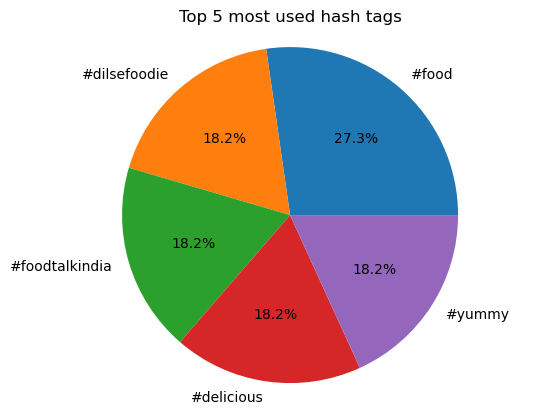

In [25]:
plt.pie(top_freq,labels = top_hash,autopct="%.1f%%")
plt.axis("equal")
plt.title("Top 5 most used hash tags")
plt.show()

##### Number of times hashtags have appeared 

In [26]:
for i in range(5):
    print(top_hash[i], top_freq[i])

#food 15
#dilsefoodie 10
#foodtalkindia 10
#delicious 10
#yummy 10


###
### You need to also calculate average followers : likes ratio for the obtained handles.
#### Followers : Likes ratio is calculated as follows:
##### Find out the likes of the top 10 posts of the 5 handles obtained earlier.
##### Calculate the average likes for a handle.
##### Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.
##### Create a bar graph to depict the above obtained information.

In [27]:
def likes_extract():
    like = driver.find_element(By.XPATH,'//section[@class="_ae5m _ae5n _ae5o"]/div/div/span/a/span/span').get_attribute('innerHTML').replace(',','')
    return int(like)

In [28]:
like_dict={}
count=0
for i in url:
    driver.execute_script('window.open(arguments[0]);',i)
    time.sleep(2)
    driver.switch_to.window(driver.window_handles[1])
    time.sleep(2)
    posts = posts_collect(10)
    likes=0
    for i in posts:
        time.sleep(1)
        i.click()
        time.sleep(1)
        likes+=likes_extract()     
        driver.back()
    like_dict[handlers[count]] = likes
    count+=1
    driver.close()
    driver.switch_to.window(driver.window_handles[0]) 
    

In [29]:
likes = list(like_dict.values())
avg_likes=[]
for i in range(5):
    avg_likes.append(likes[i]/10)   

In [30]:
follow_like=[]
for i in range(5):
    follow_like.append(followers[i]/avg_likes[i])  

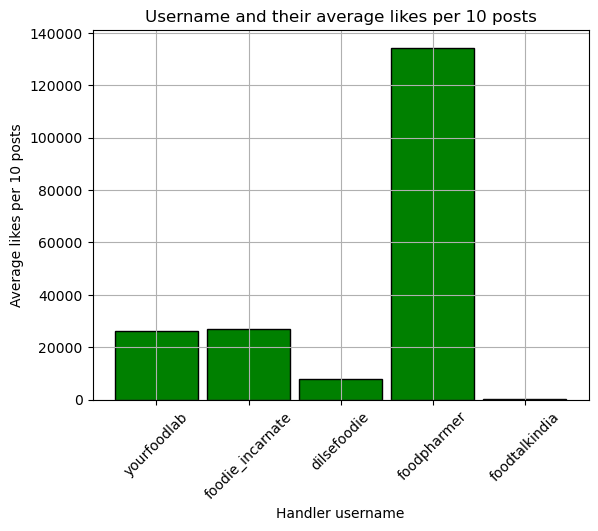

In [31]:
plt.bar(handlers,avg_likes,width = 0.9,color = 'green',edgecolor='black')
plt.xticks(rotation = 45)
plt.xlabel('Handler username')
plt.ylabel('Average likes per 10 posts')
plt.title('Username and their average likes per 10 posts')
plt.grid()
plt.show()

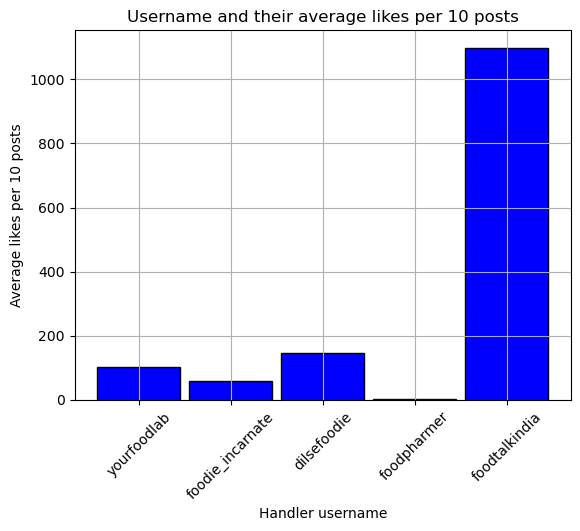

In [32]:
plt.bar(handlers,follow_like,width = 0.9,color = 'blue',edgecolor='black')
plt.xticks(rotation = 45)
plt.xlabel('Handler username')
plt.ylabel('Average likes per 10 posts')
plt.title('Username and their average likes per 10 posts')
plt.grid()
plt.show()

In [33]:
def logout():
    driver.find_element(By.XPATH,'//div[@class="xvb8j5 x1vjfegm"]/div/div[3]/span/div/a').click()
    time.sleep(3)
    driver.find_element(By.XPATH,'//div[@class="x1y1aw1k x1sxyh0 xwib8y2 xurb0ha"]/div[6]').click()

In [34]:
logout()

In [36]:
driver.quit()